# **SPAM EMAIL PREDICTION SYSTEM USING SVM**


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv", encoding='ISO-8859-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [61]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
print("Dataset Shape:", df.shape)
print("Number of duplicated rows:", df.duplicated().sum())
print("Missing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape: (5572, 3)
Number of duplicated rows: 403
Missing Values:
 Category    0
Message     0
Spam        0
dtype: int64

Unique Values per Column:
Category: 2 unique values
Message: 5169 unique values
Spam: 2 unique values


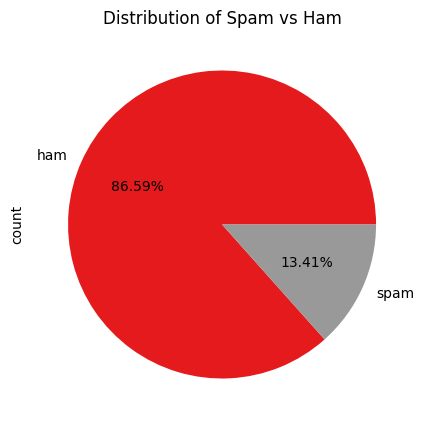

In [62]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Distribution of Spam vs Ham')
plt.show()

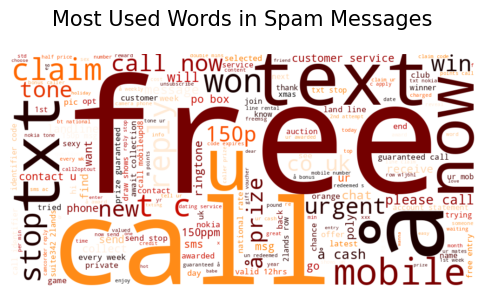

In [63]:
df_spam = df[df['Category'] == 'spam'].copy()
comment_words = ''
stopwords = set(STOPWORDS)
for val in df_spam.Message:
    val = str(val).lower()
    tokens = val.split()
    comment_words += " ".join(tokens) + " "
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stopwords,
                      min_font_size=10, max_words=1000, colormap='gist_heat_r').generate(comment_words)
plt.figure(figsize=(6, 6))
plt.title('Most Used Words in Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Train ROC AUC: 0.9852687267795479
Test ROC AUC: 0.9411604568302393


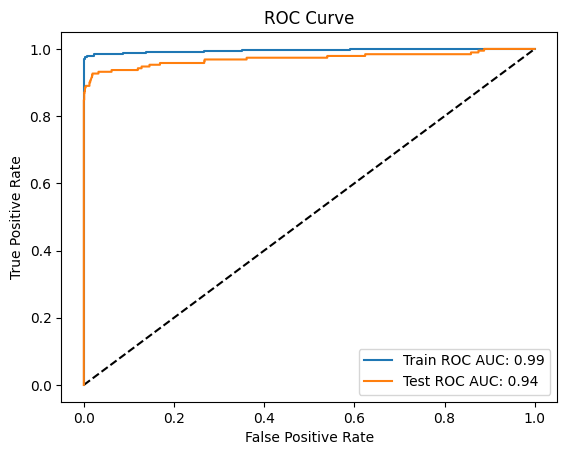

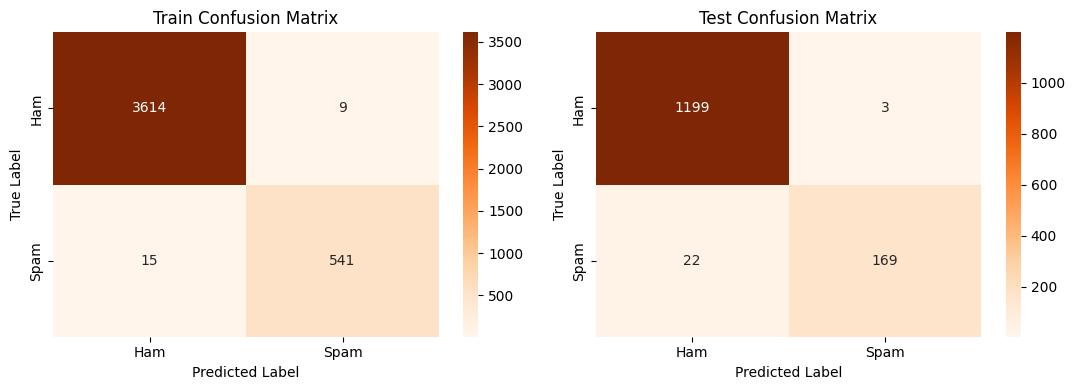


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995867 | 0.997516 |   0.996691 | 3623        |
| 1            |    0.983636 | 0.973022 |   0.9783   |  556        |
| accuracy     |    0.994257 | 0.994257 |   0.994257 |    0.994257 |
| macro avg    |    0.989751 | 0.985269 |   0.987495 | 4179        |
| weighted avg |    0.994239 | 0.994257 |   0.994244 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.981982 | 0.997504 |   0.989682 | 1202        |
| 1            |    0.982558 | 0.884817 |   0.931129 |  191        |
| accuracy     |    0.982053 | 0.982053 |   0.982053 |    0.982053 |
| macro avg    |    0.98227  | 0.94116  |   0.960406 | 1393        |
| weighted avg |    0.982061 | 0.982053 |   

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=42)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:, 1]
    pred_prob_test = model.predict_proba(X_test)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_train, tpr_train, label=f"Train ROC AUC: {roc_auc_train:.2f}")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC AUC: {roc_auc_test:.2f}")
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    sns.heatmap(cm_train, annot=True, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(cm_test, annot=True, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()

    print("\nTrain Classification Report:")
    print(pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True)).T.to_markdown())
    print("\nTest Classification Report:")
    print(pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).T.to_markdown())

    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    return [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, f1_train, f1_test]

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

scores = evaluate_model(clf, X_train, X_test, y_train, y_test)
print("\nModel Scores (Precision, Recall, Accuracy, ROC AUC, F1):")
print(f"Train: Precision={scores[0]:.2f}, Recall={scores[2]:.2f}, Accuracy={scores[4]:.2f}, ROC AUC={scores[6]:.2f}, F1={scores[8]:.2f}")
print(f"Test: Precision={scores[1]:.2f}, Recall={scores[3]:.2f}, Accuracy={scores[5]:.2f}, ROC AUC={scores[7]:.2f}, F1={scores[9]:.2f}")


In [84]:
def detect_spam(email_text):
    prediction = clf.predict([email_text])[0]
    return "This is a Spam Email!" if prediction == 1 else "This is a Ham Email!"

# User Input for Email Spam Detection
def main():
    print("\nEmail Spam Detection System")
    print("Enter an email message to check if it's spam or ham. Type 'exit' to quit.")
    while True:
        user_input = input("\nEnter email text: ")
        if user_input.lower() == 'exit':
            print("Exiting the system.")
            break
        if not user_input.strip():
            print("Please enter a valid email message.")
            continue
        result = detect_spam(user_input)
        print(result)

# Run the Interactive System
if __name__ == "__main__":
    main()


Email Spam Detection System
Enter an email message to check if it's spam or ham. Type 'exit' to quit.

Enter email text: Urgent: Your bank account has been compromised. Verify your details immediately
This is a Spam Email!

Enter email text: Please find the attached report for this week’s sales figures.
This is a Ham Email!

Enter email text: exit
Exiting the system.
